# Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import country_converter as coco
import kaleido
pio.renderers.default = "vscode"

In [3]:
ds = pd.read_csv('/Users/ice50l/Downloads/ds_salaries.csv')
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
ds.shape

(3755, 11)

In [5]:
duplicate = ds[ds.duplicated()]
print("number of duplicate rows: ", duplicate.shape)

number of duplicate rows:  (1171, 11)


In [6]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
#Check for null values
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Processing Data:
Experience levels in this dataset contains:
EI: Entry-Level
MI: Mid-Level
SE: Senior-Level
EX: Executive-Level

Exmployment types:
FT: Full-Time Employee
PT: Part-Time Employee
CT: Contractual Employee
FL: Freelancer. 

Remote-Ratio is categorized as:
100: Fully Remote
0: Fully on-site
50: Hybrid

In [9]:
dk = ds.copy()

In [10]:
ds['remote_ratio'] = ds['remote_ratio'].replace({100: 'Remote', 0:'On-site', 50:'Hybrid'})
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M


In [11]:
ds['experience_level'] = ds['experience_level'].replace('EN','Entry-level/Junior')
ds['experience_level'] = ds['experience_level'].replace('MI','Mid-level/Intermediate')
ds['experience_level'] = ds['experience_level'].replace('SE','Senior-level/Expert')
ds['experience_level'] = ds['experience_level'].replace('EX','Executive-level/Director')
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,Mid-level/Intermediate,CT,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,Mid-level/Intermediate,CT,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,Senior-level/Expert,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,Senior-level/Expert,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M


In [12]:
ds['job_title'].replace({'ML Engineer':'Machine Learning Engineer'})

0        Principal Data Scientist
1       Machine Learning Engineer
2       Machine Learning Engineer
3                  Data Scientist
4                  Data Scientist
                  ...            
3750               Data Scientist
3751     Principal Data Scientist
3752               Data Scientist
3753        Business Data Analyst
3754         Data Science Manager
Name: job_title, Length: 3755, dtype: object

In [13]:
# Finding wages for 2021-2023 for certain data jobs.
years = [2021,2022,2023]
years2123 = ds[ds['work_year'].isin(years)]
years2123.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,Mid-level/Intermediate,CT,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,Mid-level/Intermediate,CT,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,Senior-level/Expert,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,Senior-level/Expert,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M


In [14]:
top = years2123.groupby('job_title').agg({'salary_in_usd':'mean'}).reset_index()
top = top.sort_values('salary_in_usd', ascending = False)
top = top.iloc[:10]
top

,job_title,salary_in_usd
46,Data Science Tech Lead,375000.000000
19,Cloud Data Architect,250000.000000
35,Data Lead,212500.000000
28,Data Analytics Lead,211254.500000
84,Principal Data Scientist,205301.142857
83,Principal Data Engineer,192500.000000
75,Machine Learning Software Engineer,192420.000000
45,Data Science Manager,191297.701754
8,Applied Scientist,190264.482759
85,Principal Machine Learning Engineer,190000.000000


# Visualizing Data

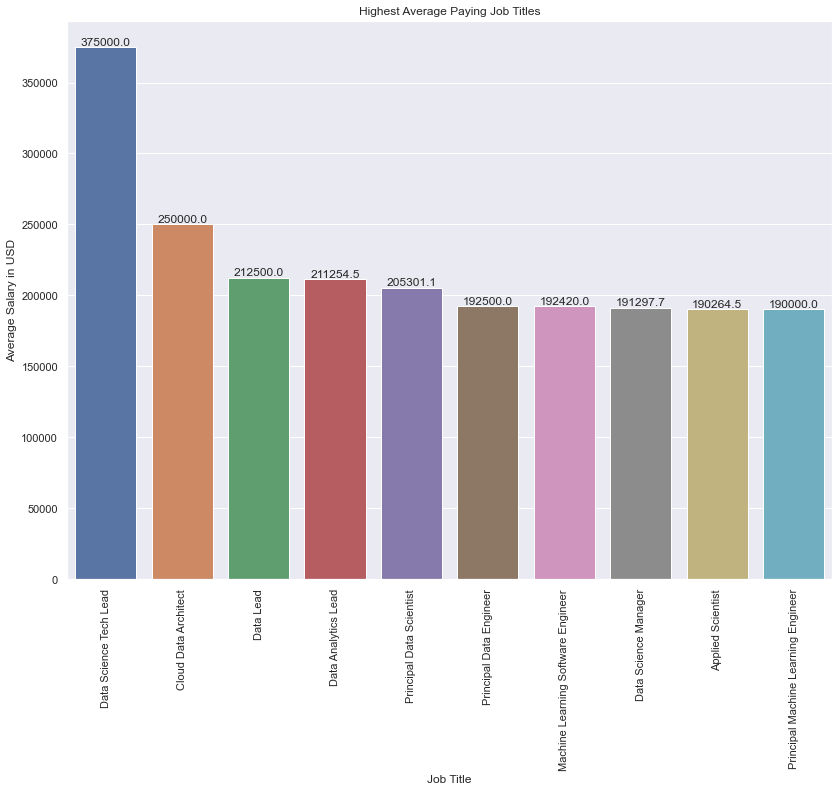

In [33]:
# Display barplot of mean salaries for the top 10 jobs.
sns.set(rc={'figure.figsize':(13.7,10.27)})
ax = sns.barplot(data = top, 
                 x = 'job_title', 
                 y  ='salary_in_usd'
                 )

plt.title('Highest Average Paying Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

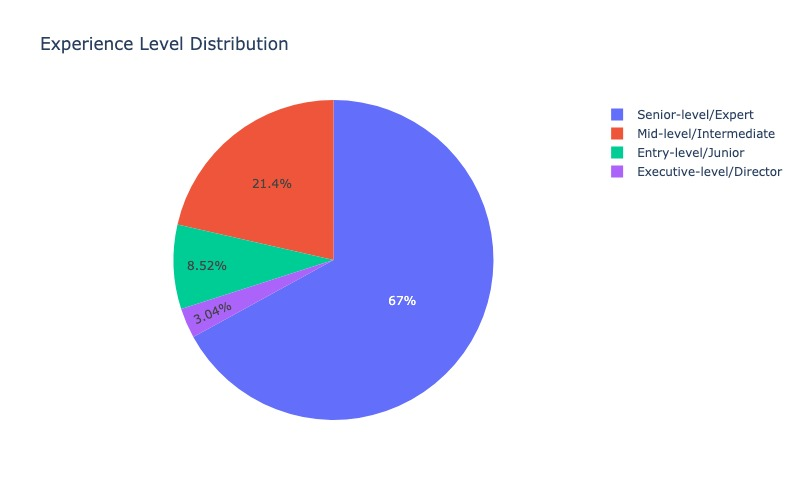

In [16]:
# Creating a pie chart based on the experience level of jobs.
experience = ds['experience_level'].value_counts()
fig = px.pie(experience, values = experience.values, names = experience.index, title = 'Experience Level Distribution')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show(renderer = 'jpeg')

In [17]:
# Top Job postings
top10jobs = ds.groupby(['job_title'])['job_title'].count().to_frame(name = 'count').reset_index()
top10jobs = top10jobs.sort_values('count', ascending = False)
top10jobs = top10jobs.iloc[:10]
top10jobs

,job_title,count
33,Data Engineer,1040
47,Data Scientist,840
25,Data Analyst,612
69,Machine Learning Engineer,289
4,Analytics Engineer,103
31,Data Architect,101
89,Research Scientist,82
45,Data Science Manager,58
8,Applied Scientist,58
88,Research Engineer,37


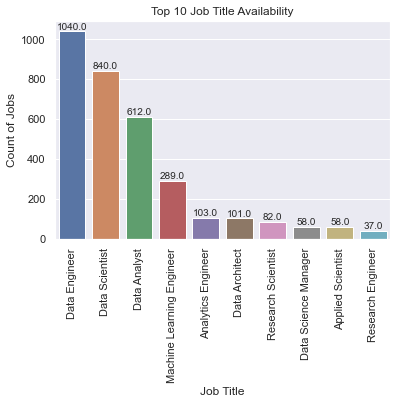

In [18]:
ax = sns.barplot(data = top10jobs, 
                 x = 'job_title', 
                 y = 'count'
                 )
plt.title('Top 10 Job Title Availability')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

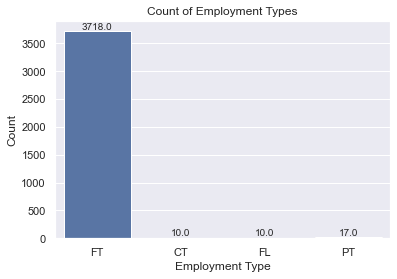

In [19]:
# Count the different amount of employment types.
ax = sns.countplot(ds, x = 'employment_type')
plt.title('Count of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

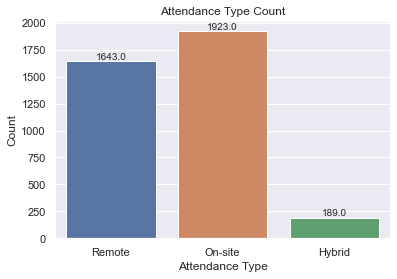

In [20]:
# Display the attendance type
ax = sns.countplot(ds, x = 'remote_ratio')
plt.title('Attendance Type Count')
plt.xlabel('Attendance Type')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

In [21]:
country = coco.convert(names = ds['employee_residence'], to = "ISO3")
ds['employee_residence'] = country

In [22]:
home = ds.groupby('employee_residence')['employee_residence'].count().to_frame('count').reset_index()
home.head()

,employee_residence,count
0,ARE,3
1,ARG,6
2,ARM,1
3,ASM,2
4,AUS,11


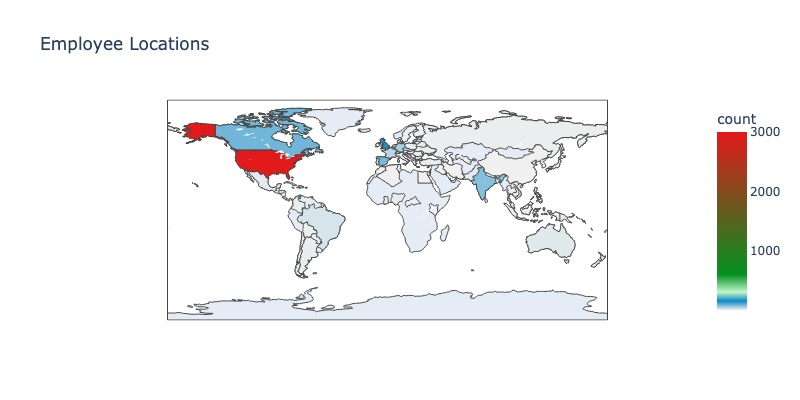

In [23]:
# Where do most employees work from?
fig = px.choropleth(home, locations = 'employee_residence', 
                    color = 'count', 
                    color_continuous_scale=
                    [[0, 'rgb(240,240,240)'],
                      [0.05, 'rgb(13,136,198)'],
                      [0.1, 'rgb(191,247,202)'],
                      [0.20, 'rgb(4,145,32)'],
                      [1, 'rgb(227,26,28,0.5)']],
                      title = 'Employee Locations',
                      width=800, height=400
                      )
fig.show(renderer = 'jpeg')

In [24]:
size_salusd = ds.groupby('company_size')['salary_in_usd'].mean().to_frame('avg_sal').reset_index()
size_salusd

,company_size,avg_sal
0,L,118300.982379
1,M,143130.548367
2,S,78226.682432


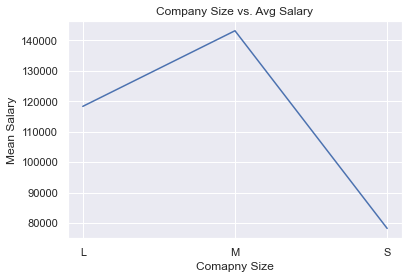

In [25]:
# Creating a line plot for company size vs the average salary.
ax = sns.lineplot(size_salusd, x = 'company_size', y = 'avg_sal')
plt.title('Company Size vs. Avg Salary')
plt.xlabel('Comapny Size')
plt.ylabel('Mean Salary')
plt.show()

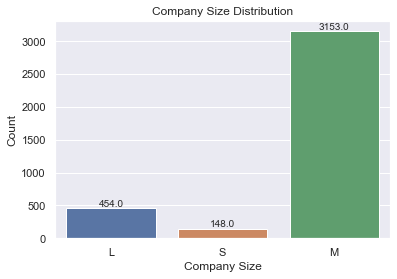

In [26]:
ax = sns.countplot(ds, x = 'company_size')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

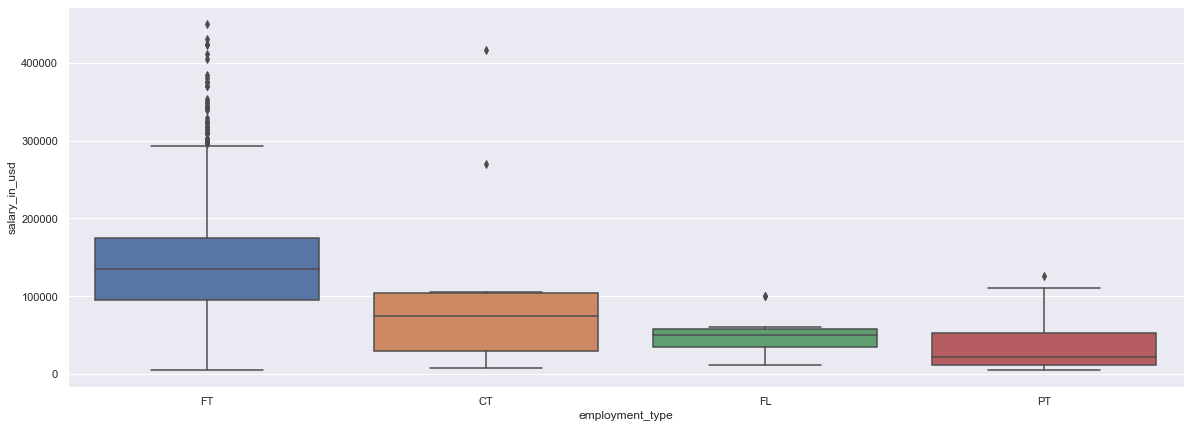

In [27]:
plt.figure(figsize=(20, 7))
sns.boxplot(ds, x = 'employment_type', y = 'salary_in_usd')

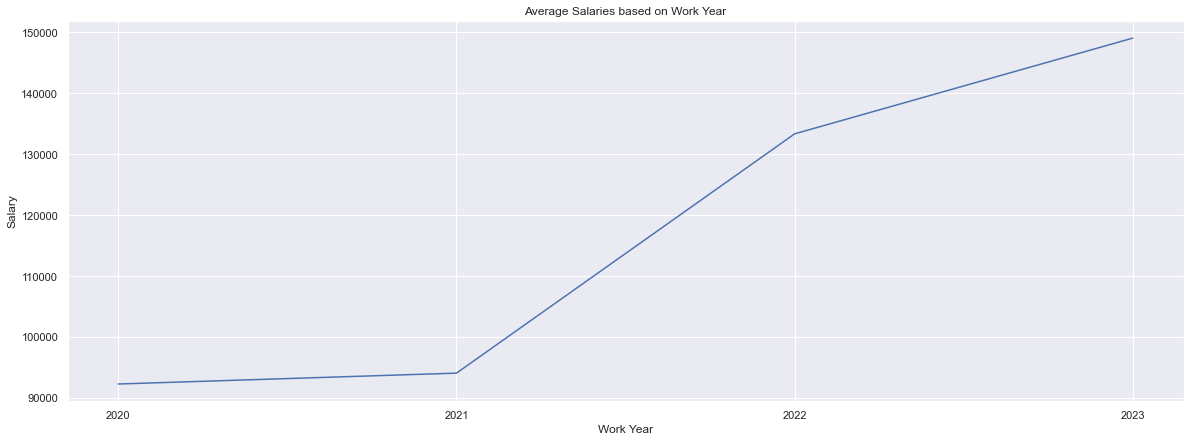

In [28]:
# Average Salary Per Year
plt.figure(figsize=(20, 7))
year_based_salary=ds['salary_in_usd'].groupby(ds['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

In [29]:
dss = dk.groupby('company_location')['remote_ratio'].mean().reset_index()
dss['company_location'] =  coco.convert(names = dss['company_location'], to = "ISO3")
dss.head()

,company_location,remote_ratio
0,ARE,66.666667
1,ALB,50.000000
2,ARM,0.000000
3,ARG,100.000000
4,ASM,66.666667


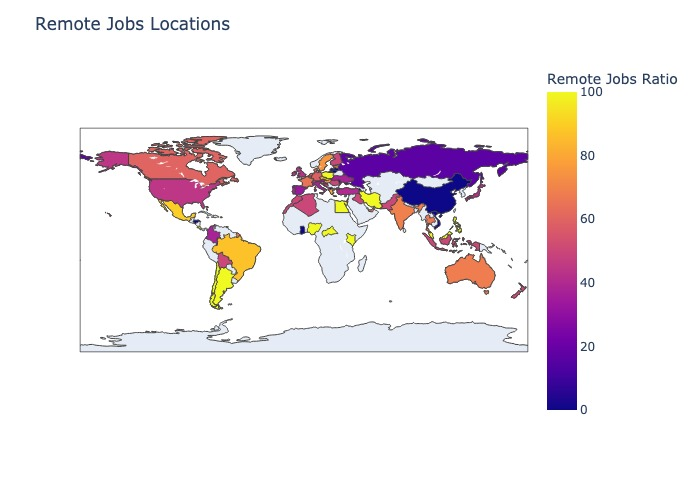

In [30]:
# Finding which country has the highest remote ratio
fig = px.choropleth(dss,
                    locations = 'company_location', 
                    color = 'remote_ratio',                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs Locations")
fig.show(renderer = 'jpeg')

In [31]:
# Using SKlearn to turn categorical values into numerical so the heatmap can be used.
categorize=['experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size']

from sklearn.preprocessing import LabelEncoder

L_encoder=LabelEncoder()

for label in categorize:
    ds[label]=L_encoder.fit_transform(ds[label])

Text(0.5, 1.0, 'Data Correlations')

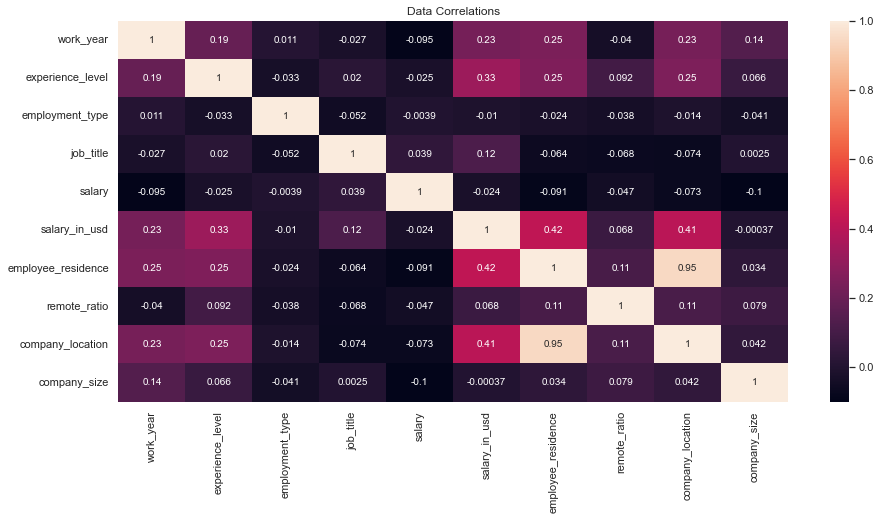

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(),annot=True)
plt.title('Data Correlations')